In [67]:
#from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter

In [68]:
#Resizing images, if needed
SIZE_X = 224 
SIZE_Y = 224
n_classes=4 #Number of classes for segmentation
num_images = 12 #Total 1600 available but we can use a subset for speedy training

In [69]:
# metrics

 

import numpy as np

import pandas as pd

 

def calculate_iou(true_mask, pred_mask):

    intersection = np.logical_and(true_mask, pred_mask)

    union = np.logical_or(true_mask, pred_mask)

    iou_score = np.sum(intersection) / np.sum(union)

    return iou_score

 

def calculate_dice_coefficient(true_mask, pred_mask):

    intersection = np.logical_and(true_mask, pred_mask)

    dice_coefficient = (2.0 * np.sum(intersection)) / (np.sum(true_mask) + np.sum(pred_mask))

    return dice_coefficient

 

def calculate_pixel_accuracy(true_mask, pred_mask):

    correct_pixels = np.sum(true_mask == pred_mask)

    total_pixels = true_mask.size

    pixel_accuracy = correct_pixels / total_pixels

    return pixel_accuracy



def calculate_segmentation_metrics(true_mask, pred_mask):

    iou_score = calculate_iou(true_mask, pred_mask)

    dice_coefficient = calculate_dice_coefficient(true_mask, pred_mask)

    pixel_accuracy = calculate_pixel_accuracy(true_mask, pred_mask)

 

    metrics_table = pd.DataFrame({

        'Metrics': ['IoU', 'Dice Coefficient', 'Pixel Accuracy'],

        'Score': [iou_score, dice_coefficient, pixel_accuracy]

    })

 

    return metrics_table

 

In [70]:
import cv2
import numpy as np

path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/Dataset_BUSI_with_GT/benign"
images_names1 = [path + '/benign ({}).png'.format(k) for k in range(1, 438)]
# images_names2 = [path + '/malignant ({}).png'.format(k) for k in range(1, 211)]
# images_names3 = [path + '/normal ({}).png'.format(k) for k in range(1, 134)]

images_names = images_names1

images_names.sort()
images_names_subset = images_names

X_train1 = []

for mask in images_names_subset:
    img = cv2.imread(mask,0)
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max + 1, x_min:x_max + 1]
  
    # Redimensionner l'image à une taille fixe de 224x224
    img = cv2.resize(img, (224, 224))
  
    X_train1.append(img)

X_train1 = np.array(X_train1)
X_train1 = np.expand_dims(X_train1, axis=-1)
X_train1 = np.repeat(X_train1, 3, axis=-1)

In [71]:
import cv2
import numpy as np

path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/Dataset_BUSI_with_GT/malignant"
# images_names1 = [path + '/benign ({}).png'.format(k) for k in range(1, 438)]
images_names2 = [path + '/malignant ({}).png'.format(k) for k in range(1, 211)]
# images_names3 = [path + '/normal ({}).png'.format(k) for k in range(1, 134)]

images_names = images_names2

images_names.sort()
images_names_subset = images_names

X_train2 = []

for mask in images_names_subset:
    img = cv2.imread(mask,0)
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max + 1, x_min:x_max + 1]
  
    # Redimensionner l'image à une taille fixe de 224x224
    img = cv2.resize(img, (224, 224))
  
    X_train2.append(img)

X_train2 = np.array(X_train2)
X_train2 = np.expand_dims(X_train2, axis=-1)
X_train2 = np.repeat(X_train2, 3, axis=-1)

In [72]:
X_train2.shape

(210, 224, 224, 3)

In [73]:
import cv2
import numpy as np

path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/Dataset_BUSI_with_GT/benign"
mask_names1 = [path + '/benign ({})_mask.png'.format(k) for k in range(1, 438)]
# mask_names2 = [path + '/malignant ({})_mask.png'.format(k) for k in range(1, 211)]
# mask_names3 = [path + '/normal ({})_mask.png'.format(k) for k in range(1, 134)]

mask_names = mask_names1

mask_names.sort()
mask_names_subset = mask_names

y_train1 = []

for mask in mask_names_subset:
    img = cv2.imread(mask, 0)
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max + 1, x_min:x_max + 1]
  
    # Redimensionner l'image à une taille fixe de 224x224
    img = cv2.resize(img, (224, 224))
  
    y_train1.append(img)

y_train1 = np.array(y_train1)



In [74]:
import cv2
import numpy as np
path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/Dataset_BUSI_with_GT/malignant"
# mask_names1 = [path + '/malignant ({})_mask.png'.format(k) for k in range(1, 438)]
mask_names2 = [path + '/malignant ({})_mask.png'.format(k) for k in range(1, 211)]
# mask_names3 = [path + '/normal ({})_mask.png'.format(k) for k in range(1, 134)]

mask_names = mask_names2

mask_names.sort()
mask_names_subset = mask_names

y_train2 = []

for mask in mask_names_subset:
    img = cv2.imread(mask, 0)
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max + 1, x_min:x_max + 1]
  
    # Redimensionner l'image à une taille fixe de 224x224
    img = cv2.resize(img, (224, 224))
  
    y_train2.append(img)

y_train2 = np.array(y_train2)

In [75]:
y_train2.shape

(210, 224, 224)

In [76]:
path= "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/train_data\img_224"
image_names = [path+'/img{}.png'.format(k) for k in range(1,13)]

image_names.sort()
image_names_subset = image_names[0:num_images]
images = [cv2.imread(image, 1) for image in image_names_subset] #SM backbones use 3 channel images, so let us read images in color.
X_train = np.array(images)
X_train = X_train

In [77]:
X_train.shape

(12, 224, 224, 3)

In [78]:
#we should replace the masks !

path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/train_data/msk3c_224"
mask_names = [path+'/img{}_mask1.png'.format(k) for k in range(1,13)]
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask1_dataset_train_ = np.array(masks)


In [79]:
#we should replace the masks !

path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/train_data/msk3c_224"
mask_names = [path+'/img{}_mask2.png'.format(k) for k in range(1,13)]
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask2_dataset_train_ = np.array(masks)

In [80]:
#we should replace the masks !

path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/train_data/msk3c_224"
mask_names = [path+'/img{}_mask3.png'.format(k) for k in range(1,13)]
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask3_dataset_train_ = np.array(masks)

In [81]:
proccesed_images = []

for i in range(12):
    img = mask1_dataset_train_[i,:,:]
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max+1, x_min:x_max+1]
    img = cv2.resize(img, (224, 224))
    proccesed_images.append(img)

mask1_dataset_train_=np.array(proccesed_images)

In [82]:
proccesed_images = []

for i in range(12):
    img = mask2_dataset_train_[i,:,:]
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max+1, x_min:x_max+1]
    img = cv2.resize(img, (224, 224))
    proccesed_images.append(img)

mask2_dataset_train_=np.array(proccesed_images)

In [83]:
proccesed_images = []

for i in range(12):
    img = mask3_dataset_train_[i,:,:]
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max+1, x_min:x_max+1]
    img = cv2.resize(img, (224, 224))
    proccesed_images.append(img)

mask3_dataset_train_=np.array(proccesed_images)

In [84]:
path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/test_data\img_224"
image_names = [path+'/img{}.png'.format(k) for k in range(13,16)]

image_names.sort()
image_names_subset = image_names[0:num_images]
images = [cv2.imread(image, 1) for image in image_names_subset] #SM backbones use 3 channel images, so let us read images in color.
X_test = np.array(images)
X_test = X_test


In [85]:
X_test.shape

(3, 224, 224, 3)

In [86]:
path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/test_data\msk3c_224"
mask_names = [path+'/img{}_mask1.png'.format(k) for k in range(13,16)]
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask1_dataset_test = np.array(masks)

In [87]:
path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/test_data\msk3c_224"
mask_names = [path+'/img{}_mask2.png'.format(k) for k in range(13,16)]
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask2_dataset_test = np.array(masks)

In [88]:
path = "train_test_full_roi-20230406T080206Z-001/train_test_full_roi/test_data\msk3c_224"
mask_names = [path+'/img{}_mask3.png'.format(k) for k in range(13,16)]
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask3_dataset_test = np.array(masks)

In [89]:
mask3_dataset_test.shape

(3, 224, 224)

In [90]:
proccesed_images = []

for i in range(3):
    img = mask1_dataset_test[i,:,:]
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max+1, x_min:x_max+1]
    img = cv2.resize(img, (224, 224))
    proccesed_images.append(img)
  
mask1_dataset_test=np.array(proccesed_images)

In [91]:
proccesed_images = []

for i in range(3):
    img = mask2_dataset_test[i,:,:]
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max+1, x_min:x_max+1]
    img = cv2.resize(img, (224, 224))
    proccesed_images.append(img)
  
mask2_dataset_test=np.array(proccesed_images)

In [92]:
proccesed_images = []

for i in range(3):
    img = mask3_dataset_test[i,:,:]
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max+1, x_min:x_max+1]
    img = cv2.resize(img, (224, 224))
    proccesed_images.append(img)
  
mask3_dataset_test=np.array(proccesed_images)

In [93]:
#Encode labels to 0, 1, 2, 3, ... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask2_dataset_train_.shape  
mask2_dataset_reshaped = mask2_dataset_train_.reshape(-1,1)
mask2_dataset_reshaped_encoded = labelencoder.fit_transform(mask2_dataset_reshaped)
y_train_mask2 = mask2_dataset_reshaped_encoded.reshape(n, h, w)

n, h, w = mask2_dataset_test.shape  
mask2_dataset_reshaped = mask2_dataset_test.reshape(-1,1)
mask2_dataset_reshaped_encoded = labelencoder.fit_transform(mask2_dataset_reshaped)
y_test_mask2 = mask2_dataset_reshaped_encoded.reshape(n, h, w)

c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
#Encode labels to 0, 1, 2, 3, ... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask1_dataset_train_.shape  
mask1_dataset_reshaped = mask1_dataset_train_.reshape(-1,1)
mask1_dataset_reshaped_encoded = labelencoder.fit_transform(mask1_dataset_reshaped)
y_train_mask1 = mask1_dataset_reshaped_encoded.reshape(n, h, w)

n, h, w = mask1_dataset_test.shape  
mask1_dataset_reshaped = mask1_dataset_test.reshape(-1,1)
mask1_dataset_reshaped_encoded = labelencoder.fit_transform(mask1_dataset_reshaped)
y_test_mask1 = mask1_dataset_reshaped_encoded.reshape(n, h, w)

c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
#Encode labels to 0, 1, 2, 3, ... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask3_dataset_train_.shape  
mask3_dataset_reshaped = mask3_dataset_train_.reshape(-1,1)
mask3_dataset_reshaped_encoded = labelencoder.fit_transform(mask3_dataset_reshaped)
y_train_mask3 = mask3_dataset_reshaped_encoded.reshape(n, h, w)

n, h, w = mask3_dataset_test.shape  
mask3_dataset_reshaped = mask3_dataset_test.reshape(-1,1)
mask3_dataset_reshaped_encoded = labelencoder.fit_transform(mask3_dataset_reshaped)
y_test_mask3 = mask3_dataset_reshaped_encoded.reshape(n, h, w)

c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
X_train_total = np.concatenate((X_train, X_train1, X_train2), axis=0)
y_train_mask1_total = np.concatenate((y_train_mask1, y_train1, y_train2),axis=0)
y_train_mask2_total = np.concatenate((y_train_mask2, y_train1, y_train2),axis=0)
y_train_mask3_total = np.concatenate((y_train_mask3, y_train1, y_train2),axis=0)


In [97]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, 2, strides=2, padding="same")(inputs) # up conv
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet0(input_shape): # 3 encoder blocks and 3 decoder blocks
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)

    b1 = conv_block(p3, 256)

    d1 = decoder_block(b1, s3, 128)
    d2 = decoder_block(d1, s2, 64)
    d3 = decoder_block(d2, s1, 32)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d3)

    model = Model(inputs, outputs, name="UNET")
    return model
    
def build_unet1(input_shape): # 4 encoder blocks and 4 decoder blocks
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)
    s4, p4 = encoder_block(p3, 256)

    b1 = conv_block(p4, 512)

    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model


def build_unet2(input_shape): # 5 encoder blocks and 5 decoder blocks
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)
    s4, p4 = encoder_block(p3, 256)
    s5, p5 = encoder_block(p4, 512)

    b1 = conv_block(p5, 1024)
    
    d1 = decoder_block(b1, s5, 512)
    d2 = decoder_block(d1, s4, 256)
    d3 = decoder_block(d2, s3, 128)
    d4 = decoder_block(d3, s2, 64)
    d5 = decoder_block(d4, s1, 32)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d5)

    model = Model(inputs, outputs, name="UNET")
    return model

if __name__ == "__main__":
    input_shape = (224, 224, 3)
    model = build_unet2(input_shape)
    model.summary()


Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_92 (Conv2D)             (None, 224, 224, 32  896         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_88 (BatchN  (None, 224, 224, 32  128        ['conv2d_92[0][0]']              
 ormalization)                  )                                                              

In [98]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [99]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam


""" Global parameters """
H = 224
W = 224


def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)



def tf_parse(x, y):
    def _parse(x, y):
        x = cv2.resize(x, (W, H))
        x = x 
        x = x.astype(np.float32)
        y = cv2.resize(y, (W, H))
        y = y 
        y = y.astype(np.float32)
        y = np.expand_dims(y, axis=-1)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y


def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("files")

    """ Hyperparameters """
    batch_size = 4
    lr = 1e-4
    num_epochs = 5
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "log.csv")

    """ Dataset """
    train_x, train_y = X_train_total , y_train_mask1_total 
    test_x, test_y = X_test , y_test_mask1 

    print(f"Train: {len(X_train)} - {len(y_train_mask1_total)}")
    print(f"Test : {len(X_test)} - {len(y_test_mask1)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    test_dataset = tf_dataset(train_x, train_y, batch=batch_size)

    """ Model """
    model_mask1_total = build_unet2((H, W, 3)) #  Choose your model
    model_mask1_total.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
    ]

    model_mask1_total.fit(
        train_dataset,
        epochs=num_epochs,
        callbacks=callbacks
    )


Train: 12 - 659
Test : 3 - 3
Epoch 1/5
165/165 [==============================] - 314s 2s/step - loss: -0.7067 - dice_coef: 1.7069 - lr: 1.0000e-04
Epoch 2/5
165/165 [==============================] - 310s 2s/step - loss: -0.8494 - dice_coef: 1.8494 - lr: 1.0000e-04
Epoch 3/5
165/165 [==============================] - 309s 2s/step - loss: -0.8796 - dice_coef: 1.8797 - lr: 1.0000e-04
Epoch 4/5
165/165 [==============================] - 312s 2s/step - loss: -0.8897 - dice_coef: 1.8898 - lr: 1.0000e-04
Epoch 5/5
165/165 [==============================] - 315s 2s/step - loss: -0.8965 - dice_coef: 1.8965 - lr: 1.0000e-04


  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 1s 814ms/step


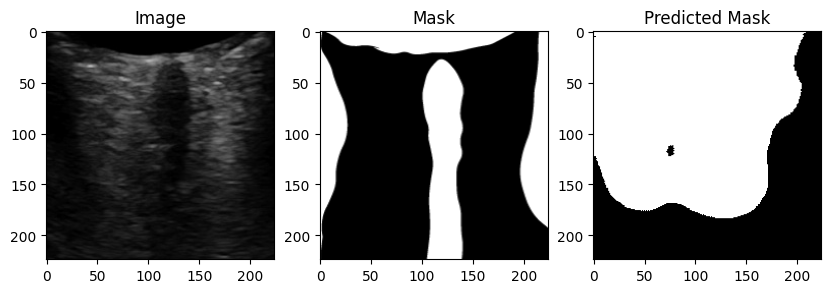

 33%|███▎      | 1/3 [00:01<00:03,  1.51s/it]

1/1 [==============================] - 0s 173ms/step


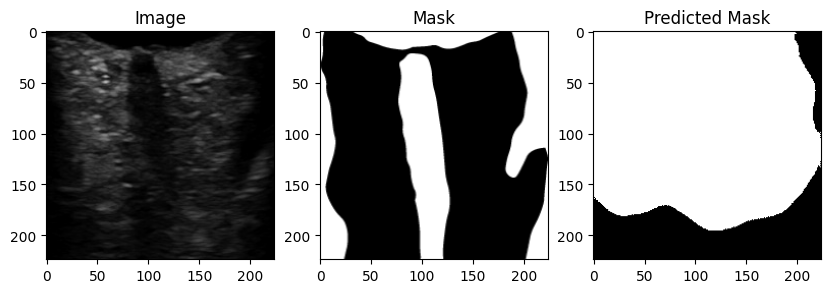

 67%|██████▋   | 2/3 [00:03<00:01,  1.60s/it]

1/1 [==============================] - 0s 185ms/step


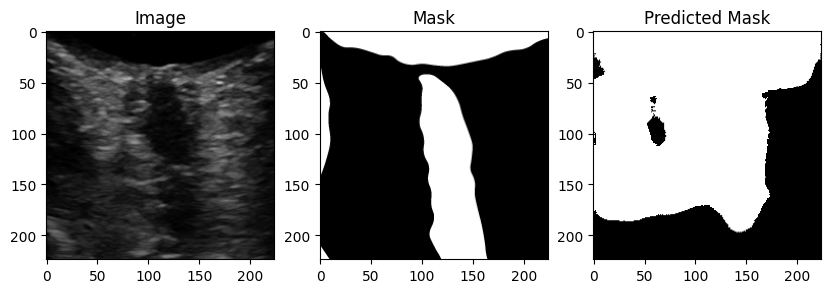

100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


In [100]:
###########################################################################################################################################################################################################
#=========================================================================================================================================================================================================#
#UNET MODEL TRAINED ON BREAST CANCER IMAGES :  MASK 1 \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\#
#=========================================================================================================================================================================================================#
###########################################################################################################################################################################################################
# batch = 4 , 10 - 0.47 - 1e-4 mask 1 (Unet1)

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """
    test_x, test_y = X_test , y_test_mask1 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = model_mask1_total.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.47).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

#         """ Calculate the scores """
#         f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
#         jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
#         recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         SCORE.append([name, f1_value, jac_value, recall_value, precision_value])
        
#     """ Metrics values """
#     score = [s[1:]for s in SCORE]
#     score = np.mean(score, axis=0)
#     print(f"F1: {score[0]:0.5f}")
#     print(f"Jaccard: {score[1]:0.5f}")
#     print(f"Recall: {score[2]:0.5f}")
#     print(f"Precision: {score[3]:0.5f}")

#     df = pd.DataFrame(SCORE, columns=["Image", "F1", "Jaccard", "Recall", "Precision"])
#     df.to_csv("files/score.csv")


In [101]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam


""" Global parameters """
H = 224
W = 224


def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)



def tf_parse(x, y):
    def _parse(x, y):
        x = cv2.resize(x, (W, H))
        x = x 
        x = x.astype(np.float32)
        y = cv2.resize(y, (W, H))
        y = y 
        y = y.astype(np.float32)
        y = np.expand_dims(y, axis=-1)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y


def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("files")

    """ Hyperparameters """
    batch_size = 4
    lr = 1e-4
    num_epochs = 5
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "log.csv")

    """ Dataset """
    train_x, train_y = X_train_total , y_train_mask2_total 
    test_x, test_y = X_test , y_test_mask2 

    print(f"Train: {len(X_train)} - {len(y_train_mask2_total)}")
    print(f"Test : {len(X_test)} - {len(y_test_mask2)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    test_dataset = tf_dataset(train_x, train_y, batch=batch_size)

    """ Model """
    model_mask2_total = build_unet2((H, W, 3)) #  Choose your model
    model_mask2_total.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
    ]

    model_mask2_total.fit(
        train_dataset,
        epochs=num_epochs,
        callbacks=callbacks
    )

Train: 12 - 659
Test : 3 - 3
Epoch 1/5
165/165 [==============================] - 328s 2s/step - loss: -0.5434 - dice_coef: 1.5437 - lr: 1.0000e-04
Epoch 2/5
165/165 [==============================] - 310s 2s/step - loss: -0.8019 - dice_coef: 1.8020 - lr: 1.0000e-04
Epoch 3/5
165/165 [==============================] - 321s 2s/step - loss: -0.8417 - dice_coef: 1.8417 - lr: 1.0000e-04
Epoch 4/5
165/165 [==============================] - 316s 2s/step - loss: -0.8624 - dice_coef: 1.8625 - lr: 1.0000e-04
Epoch 5/5
165/165 [==============================] - 320s 2s/step - loss: -0.8800 - dice_coef: 1.8801 - lr: 1.0000e-04


  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 1s 765ms/step


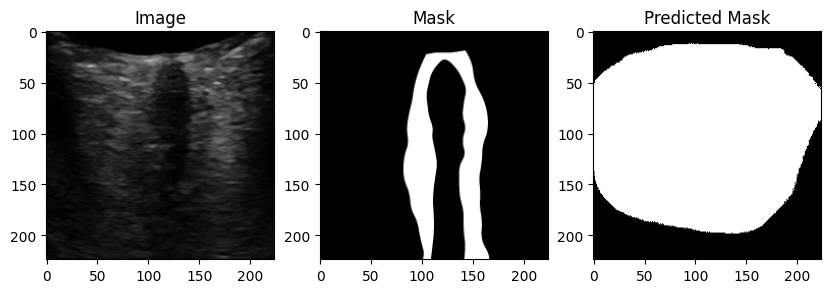

 33%|███▎      | 1/3 [00:01<00:02,  1.22s/it]

1/1 [==============================] - 0s 185ms/step


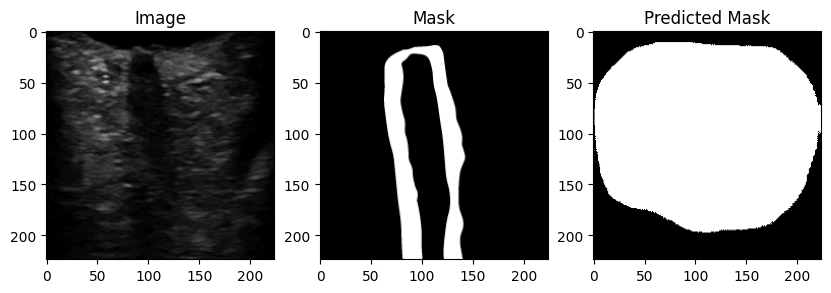

 67%|██████▋   | 2/3 [00:01<00:00,  1.15it/s]

1/1 [==============================] - 0s 190ms/step


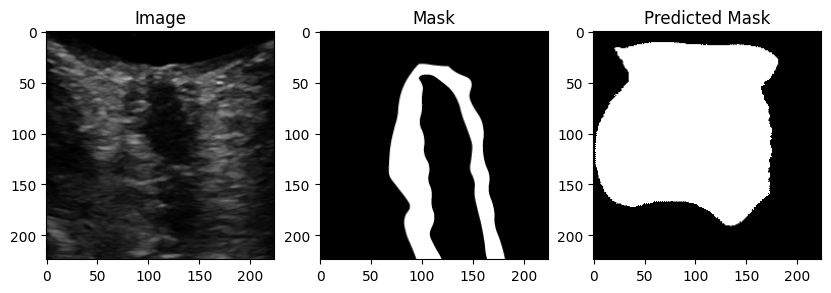

100%|██████████| 3/3 [00:02<00:00,  1.23it/s]


In [102]:
###########################################################################################################################################################################################################
#=========================================================================================================================================================================================================#
#UNET MODEL TRAINED ON BREAST CANCER IMAGES :  MASK 2 \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\#
#=========================================================================================================================================================================================================#
###########################################################################################################################################################################################################
# batch = 4 , 10 - 0.47 - 1e-4 mask 1 (Unet1)

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """
    test_x, test_y = X_test , y_test_mask2 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = model_mask2_total.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.47).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

#         """ Calculate the scores """
#         f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
#         jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
#         recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         SCORE.append([name, f1_value, jac_value, recall_value, precision_value])
        
#     """ Metrics values """
#     score = [s[1:]for s in SCORE]
#     score = np.mean(score, axis=0)
#     print(f"F1: {score[0]:0.5f}")
#     print(f"Jaccard: {score[1]:0.5f}")
#     print(f"Recall: {score[2]:0.5f}")
#     print(f"Precision: {score[3]:0.5f}")

#     df = pd.DataFrame(SCORE, columns=["Image", "F1", "Jaccard", "Recall", "Precision"])
#     df.to_csv("files/score.csv")


In [103]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam


""" Global parameters """
H = 224
W = 224


def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)



def tf_parse(x, y):
    def _parse(x, y):
        x = cv2.resize(x, (W, H))
        x = x 
        x = x.astype(np.float32)
        y = cv2.resize(y, (W, H))
        y = y 
        y = y.astype(np.float32)
        y = np.expand_dims(y, axis=-1)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y


def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("files")

    """ Hyperparameters """
    batch_size = 4
    lr = 1e-4
    num_epochs = 5
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "log.csv")

    """ Dataset """
    train_x, train_y = X_train_total , y_train_mask3_total 
    test_x, test_y = X_test , y_test_mask3 

    print(f"Train: {len(X_train)} - {len(y_train_mask3_total)}")
    print(f"Test : {len(X_test)} - {len(y_test_mask3)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    test_dataset = tf_dataset(train_x, train_y, batch=batch_size)

    """ Model """
    model_mask3_total = build_unet2((H, W, 3)) #  Choose your model
    model_mask3_total.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
    ]

    model_mask3_total.fit(
        train_dataset,
        epochs=num_epochs,
        callbacks=callbacks
    )

Train: 12 - 659
Test : 3 - 3
Epoch 1/5
165/165 [==============================] - 302s 2s/step - loss: -0.6877 - dice_coef: 1.6880 - lr: 1.0000e-04
Epoch 2/5
165/165 [==============================] - 267s 2s/step - loss: -0.8470 - dice_coef: 1.8470 - lr: 1.0000e-04
Epoch 3/5
165/165 [==============================] - 248s 2s/step - loss: -0.8730 - dice_coef: 1.8730 - lr: 1.0000e-04
Epoch 4/5
165/165 [==============================] - 235s 1s/step - loss: -0.8841 - dice_coef: 1.8841 - lr: 1.0000e-04
Epoch 5/5
165/165 [==============================] - 237s 1s/step - loss: -0.8827 - dice_coef: 1.8828 - lr: 1.0000e-04


  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 0s 431ms/step


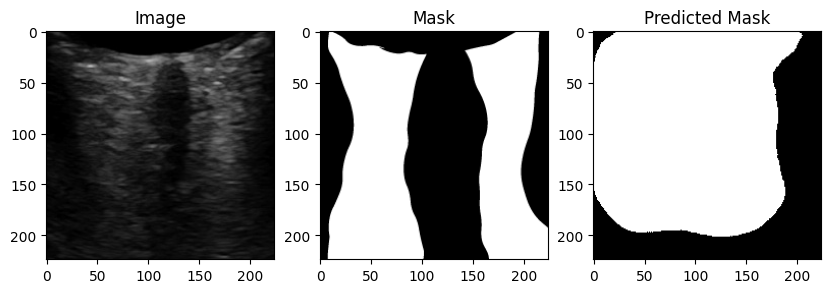

 33%|███▎      | 1/3 [00:00<00:01,  1.45it/s]

1/1 [==============================] - 0s 118ms/step


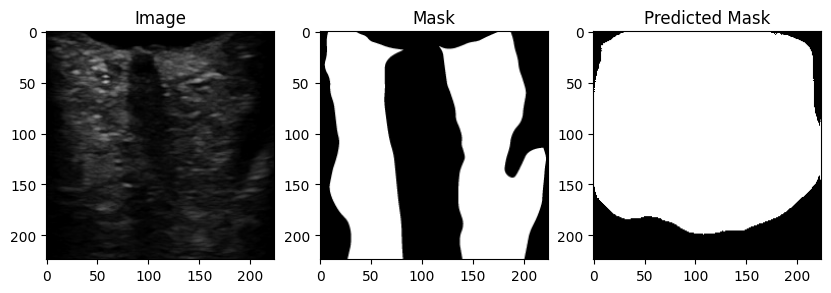

 67%|██████▋   | 2/3 [00:01<00:00,  2.02it/s]

1/1 [==============================] - 0s 117ms/step


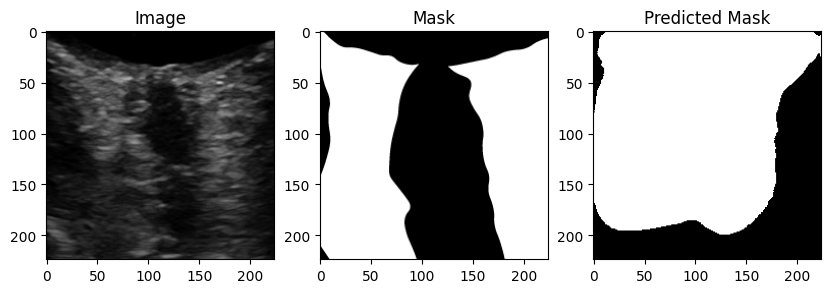

100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


In [104]:
###########################################################################################################################################################################################################
#=========================================================================================================================================================================================================#
#UNET MODEL TRAINED ON BREAST CANCER IMAGES :  MASK 3 \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\#
#=========================================================================================================================================================================================================#
###########################################################################################################################################################################################################
# batch = 4 , 10 - 0.47 - 1e-4 mask 1 (Unet1)

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """
    test_x, test_y = X_test , y_test_mask3 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = model_mask3_total.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.47).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

#         """ Calculate the scores """
#         f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
#         jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
#         recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         SCORE.append([name, f1_value, jac_value, recall_value, precision_value])
        
#     """ Metrics values """
#     score = [s[1:]for s in SCORE]
#     score = np.mean(score, axis=0)
#     print(f"F1: {score[0]:0.5f}")
#     print(f"Jaccard: {score[1]:0.5f}")
#     print(f"Recall: {score[2]:0.5f}")
#     print(f"Precision: {score[3]:0.5f}")

#     df = pd.DataFrame(SCORE, columns=["Image", "F1", "Jaccard", "Recall", "Precision"])
#     df.to_csv("files/score.csv")


3/3 [==============================] - 3s 841ms/step - loss: -3173.5793 - lr: 0.0010


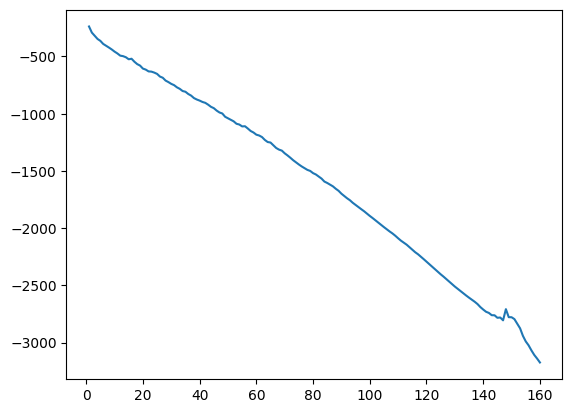

In [105]:
###########################################################################################################################################################################################################
#=========================================================================================================================================================================================================#
#ENCODER DECODER  MODEL TRAINED ON BREAST CANCER IMAGES :  MASK 1 \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\#
#=========================================================================================================================================================================================================#
###########################################################################################################################################################################################################

from tensorflow.keras.models import Model

""" Seeding """
np.random.seed(42)
tf.random.set_seed(42)

""" Directory for storing files """
create_dir("files")

""" Hyperparameters """
batch_size = 4
lr = 1e-4
num_epochs = 10
model_path = os.path.join("files", "model.h5")
csv_path = os.path.join("files", "log.csv")

""" Dataset """
train_x, train_y = X_train , mask1_dataset_train_
test_x, test_y = X_test , mask1_dataset_test



train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
test_dataset = tf_dataset(train_x, train_y, batch=batch_size)

""" Model """
weights = model_mask1_total.get_weights()
new_model_mask1 = build_unet2((H, W, 3))
new_model_mask1.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])
new_model_mask1.set_weights(weights)

callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
    ]




# Assuming 'model' is your UNET model
encoder_decoder_mask1 = Model(inputs=new_model_mask1.input, outputs=new_model_mask1.output)

for layer in encoder_decoder_mask1.layers[:45]:
    layer.trainable = False



# # Create the decoder part of the model
# decoder_input = Input(shape=encoder.output.shape[1:])  # Use encoder output shape as input shape
# decoder_output = new_model(decoder_input)  # Pass the input through the new_model
# decoder = Model(inputs=decoder_input, outputs=decoder_output)

# Compile the decoder with desired optimizer and loss function
encoder_decoder_mask1.compile(optimizer='adam', loss='binary_crossentropy')

# # Train the decoder with your data
# encoder_decoder_mask1.fit(train_dataset,
#             epochs=num_epochs*16,
#             callbacks=callbacks)


epoch_loss_values = []  # List to store the loss of each epoch

# ... previous code ...

for epoch in range(num_epochs*16):
    # Train the decoder with your data
    history = encoder_decoder_mask1.fit(train_dataset, epochs=1, callbacks=callbacks)
    
    # Access the loss value for the current epoch from the training history
    epoch_loss = history.history['loss'][0]
    epoch_loss_values.append(epoch_loss)

X = [i+1 for i in range(num_epochs*16)]

plt.plot(X, epoch_loss_values)


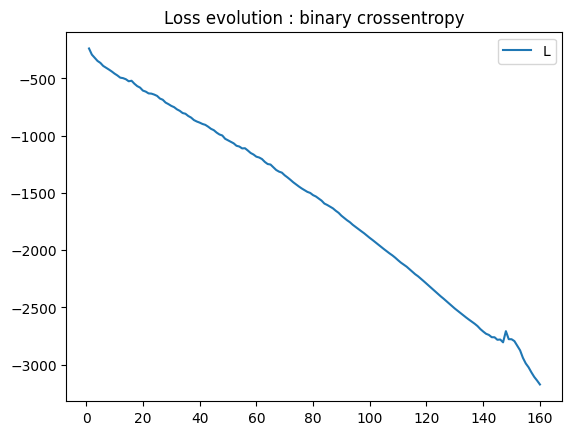

In [119]:
X = [i+1 for i in range((16*num_epochs))]
plt.plot(X, epoch_loss_values)
plt.legend("Loss")
plt.title("Loss evolution : binary crossentropy")
plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 0s 420ms/step


,Metrics,Score
0,IoU,0.508514
1,Dice Coefficient,0.005693
2,Pixel Accuracy,0.569296


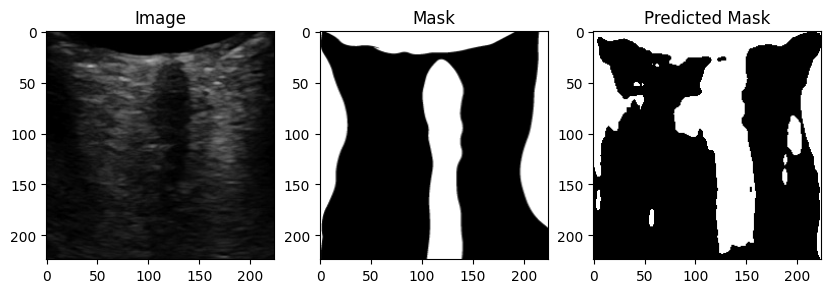

 33%|███▎      | 1/3 [00:00<00:01,  1.43it/s]

1/1 [==============================] - 0s 110ms/step


,Metrics,Score
0,IoU,0.471404
1,Dice Coefficient,0.005432
2,Pixel Accuracy,0.545719


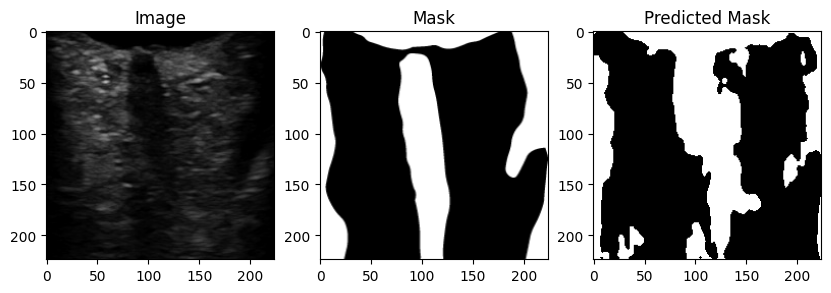

 67%|██████▋   | 2/3 [00:01<00:00,  2.02it/s]

1/1 [==============================] - 0s 110ms/step


,Metrics,Score
0,IoU,0.621338
1,Dice Coefficient,0.006349
2,Pixel Accuracy,0.642837


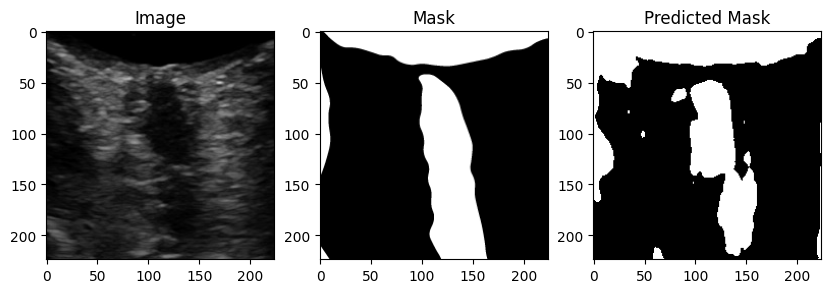

100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


In [106]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """

    test_x, test_y = X_test , y_test_mask1 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = encoder_decoder_mask1.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.9).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        

        """metrics"""

        df = calculate_segmentation_metrics(mask, y_pred)
        display(df)


        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

        
    

3/3 [==============================] - 3s 1s/step - loss: -3218.2302 - lr: 0.0010


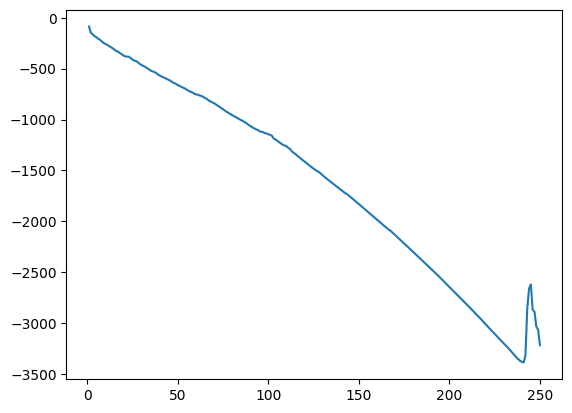

In [114]:
###########################################################################################################################################################################################################
#=========================================================================================================================================================================================================#
#ENCODER DECODER  MODEL TRAINED ON BREAST CANCER IMAGES :  MASK 2 \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\#
#=========================================================================================================================================================================================================#
###########################################################################################################################################################################################################

from tensorflow.keras.models import Model

""" Seeding """
np.random.seed(42)
tf.random.set_seed(42)

""" Directory for storing files """
create_dir("files")

""" Hyperparameters """
batch_size = 4
lr = 1e-4
num_epochs = 10
model_path = os.path.join("files", "model.h5")
csv_path = os.path.join("files", "log.csv")

""" Dataset """
train_x, train_y = X_train , mask2_dataset_train_
test_x, test_y = X_test , mask2_dataset_test



train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
test_dataset = tf_dataset(train_x, train_y, batch=batch_size)

""" Model """
weights = model_mask2_total.get_weights()
new_model_mask2 = build_unet2((H, W, 3))
new_model_mask2.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])
new_model_mask2.set_weights(weights)

callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
    ]




# Assuming 'model' is your UNET model
encoder_decoder_mask2 = Model(inputs=new_model_mask2.input, outputs=new_model_mask2.output)

for layer in encoder_decoder_mask2.layers[:45]:
    layer.trainable = False



# # Create the decoder part of the model
# decoder_input = Input(shape=encoder.output.shape[1:])  # Use encoder output shape as input shape
# decoder_output = new_model(decoder_input)  # Pass the input through the new_model
# decoder = Model(inputs=decoder_input, outputs=decoder_output)

# Compile the decoder with desired optimizer and loss function
encoder_decoder_mask2.compile(optimizer='adam', loss='binary_crossentropy')

# # Train the decoder with your data
# encoder_decoder_mask2.fit(train_dataset,
#             epochs=num_epochs*16,
#             callbacks=callbacks)


epoch_loss_values2 = []  # List to store the loss of each epoch

# ... previous code ...

for epoch in range(num_epochs*25):
    # Train the decoder with your data
    history = encoder_decoder_mask2.fit(train_dataset, epochs=1, callbacks=callbacks)
    
    # Access the loss value for the current epoch from the training history
    epoch_loss = history.history['loss'][0]
    epoch_loss_values2.append(epoch_loss)

X = [i+1 for i in range(num_epochs*25)]

plt.plot(X, epoch_loss_values2)
plt.legend("Loss")
plt.title("Loss evolution : binary crossentropy")
plt.show()

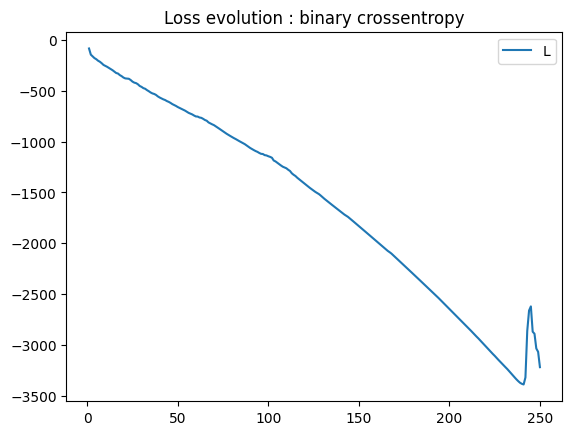

In [116]:
plt.plot(X, epoch_loss_values2)
plt.legend("Loss")
plt.title("Loss evolution : binary crossentropy")
plt.show()

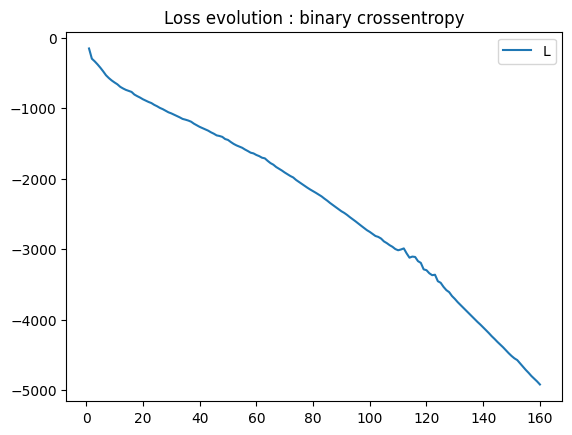

In [118]:
X = [i+1 for i in range((16*num_epochs))]
plt.plot(X, epoch_loss_values3)
plt.legend("Loss")
plt.title("Loss evolution : binary crossentropy")
plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 1s 895ms/step


,Metrics,Score
0,IoU,0.309765
1,Dice Coefficient,0.107289
2,Pixel Accuracy,0.472178


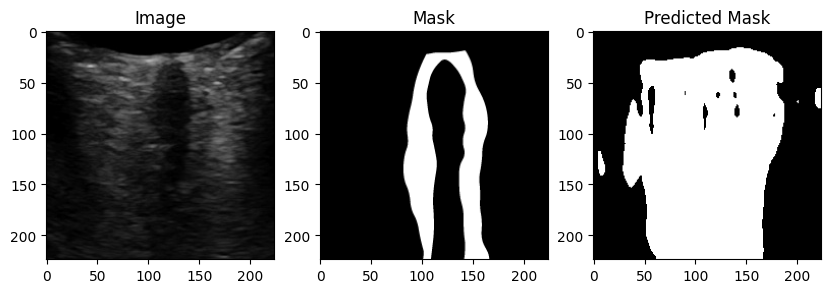

 33%|███▎      | 1/3 [00:01<00:02,  1.39s/it]

1/1 [==============================] - 0s 188ms/step


,Metrics,Score
0,IoU,0.282730
1,Dice Coefficient,0.106907
2,Pixel Accuracy,0.487305


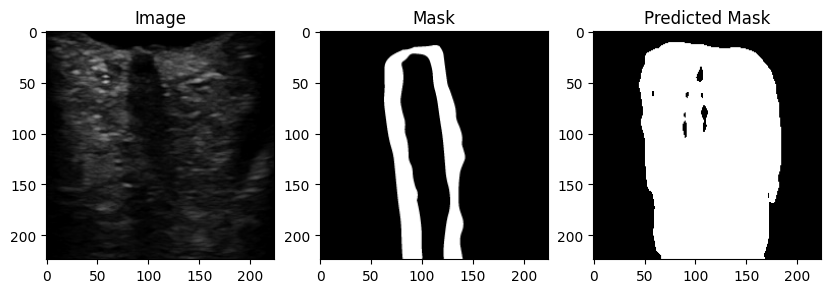

 67%|██████▋   | 2/3 [00:01<00:00,  1.08it/s]

1/1 [==============================] - 0s 164ms/step


,Metrics,Score
0,IoU,0.374152
1,Dice Coefficient,0.098075
2,Pixel Accuracy,0.616191


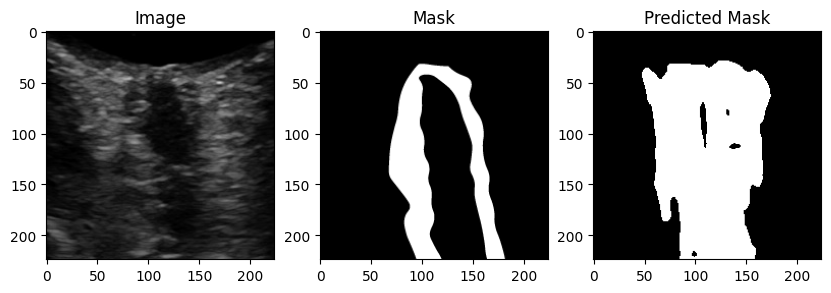

100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


In [115]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """

    test_x, test_y = X_test , y_test_mask2 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = encoder_decoder_mask2.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.9).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """metrics"""

        df = calculate_segmentation_metrics(mask, y_pred)
        display(df)

        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()
        

3/3 [==============================] - 4s 1s/step - loss: -4921.2261 - lr: 0.0010


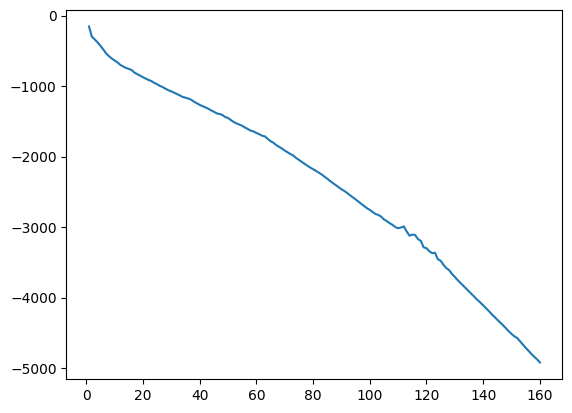

In [111]:
###########################################################################################################################################################################################################
#=========================================================================================================================================================================================================#
#ENCODER DECODER  MODEL TRAINED ON BREAST CANCER IMAGES :  MASK 3 \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\#
#=========================================================================================================================================================================================================#
###########################################################################################################################################################################################################

from tensorflow.keras.models import Model

""" Seeding """
np.random.seed(42)
tf.random.set_seed(42)

""" Directory for storing files """
create_dir("files")

""" Hyperparameters """
batch_size = 4
lr = 1e-4
num_epochs = 10
model_path = os.path.join("files", "model.h5")
csv_path = os.path.join("files", "log.csv")

""" Dataset """
train_x, train_y = X_train , mask3_dataset_train_
test_x, test_y = X_test , mask3_dataset_test



train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
test_dataset = tf_dataset(train_x, train_y, batch=batch_size)

""" Model """
weights = model_mask3_total.get_weights()
new_model_mask3 = build_unet2((H, W, 3))
new_model_mask3.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])
new_model_mask3.set_weights(weights)

callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
    ]




# Assuming 'model' is your UNET model
encoder_decoder_mask3 = Model(inputs=new_model_mask3.input, outputs=new_model_mask3.output)

for layer in encoder_decoder_mask3.layers[:45]:
    layer.trainable = False



# # Create the decoder part of the model
# decoder_input = Input(shape=encoder.output.shape[1:])  # Use encoder output shape as input shape
# decoder_output = new_model(decoder_input)  # Pass the input through the new_model
# decoder = Model(inputs=decoder_input, outputs=decoder_output)

# Compile the decoder with desired optimizer and loss function
encoder_decoder_mask3.compile(optimizer='adam', loss='binary_crossentropy')

# Train the decoder with your data
# encoder_decoder_mask3.fit(train_dataset,
#             epochs=num_epochs*16,
#             callbacks=callbacks)

epoch_loss_values3 = []  # List to store the loss of each epoch

# ... previous code ...

for epoch in range(num_epochs*16):
    # Train the decoder with your data
    history = encoder_decoder_mask3.fit(train_dataset, epochs=1, callbacks=callbacks)
    
    # Access the loss value for the current epoch from the training history
    epoch_loss = history.history['loss'][0]
    epoch_loss_values3.append(epoch_loss)

X = [i+1 for i in range(num_epochs*16)]

plt.plot(X, epoch_loss_values3)



  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 1s 779ms/step


,Metrics,Score
0,IoU,0.635470
1,Dice Coefficient,0.094464
2,Pixel Accuracy,0.335678


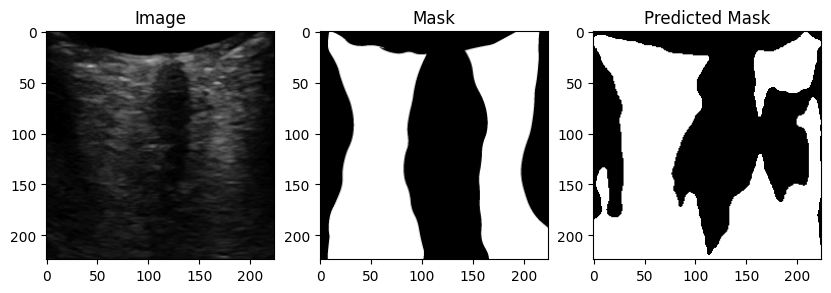

 33%|███▎      | 1/3 [00:01<00:02,  1.21s/it]

1/1 [==============================] - 0s 184ms/step


,Metrics,Score
0,IoU,0.708653
1,Dice Coefficient,0.097865
2,Pixel Accuracy,0.366191


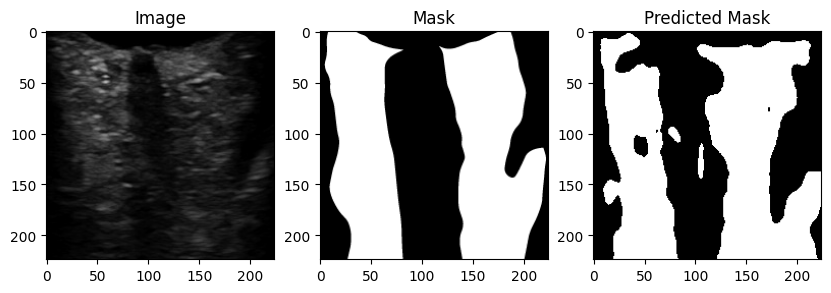

 67%|██████▋   | 2/3 [00:01<00:00,  1.19it/s]

1/1 [==============================] - 0s 172ms/step


,Metrics,Score
0,IoU,0.542675
1,Dice Coefficient,0.075622
2,Pixel Accuracy,0.332290


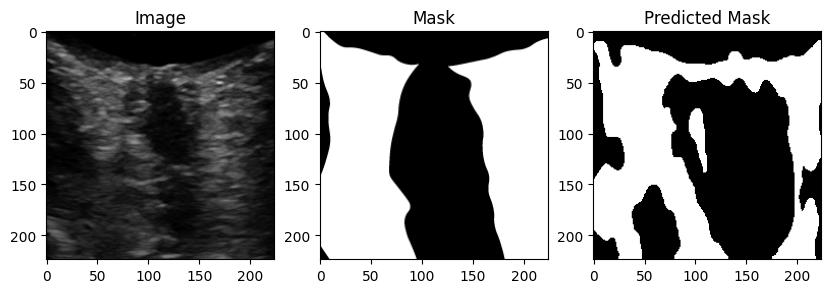

100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


In [112]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """

    test_x, test_y = X_test , y_test_mask3 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = encoder_decoder_mask3.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.9).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        

        """metrics"""

        df = calculate_segmentation_metrics(mask, y_pred)
        display(df)


        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """
    train_x, train_y = X_train , y_train 
    test_x, test_y = X_test , y_test 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = encoder_decoder.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.9).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

NameError: name 'y_train' is not defined

In [ ]:
#Mask 2 

""" Dataset """
train_x, train_y = X_train , mask_dataset_train_
test_x, test_y = X_test , mask_dataset_test

print(f"Train: {len(X_train)} - {len(y_train)}")
print(f"Test : {len(X_test)} - {len(y_test)}")

train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
test_dataset = tf_dataset(train_x, train_y, batch=batch_size)


# Assuming 'model' is your UNET model
encoder_decoder_mask2 = Model(inputs=new_model.input, outputs=new_model.output)

for layer in encoder_decoder.layers[:45]:
    layer.trainable = False



# # Create the decoder part of the model
# decoder_input = Input(shape=encoder.output.shape[1:])  # Use encoder output shape as input shape
# decoder_output = new_model(decoder_input)  # Pass the input through the new_model
# decoder = Model(inputs=decoder_input, outputs=decoder_output)

# Compile the decoder with desired optimizer and loss function
encoder_decoder_mask2.compile(optimizer='adam', loss='binary_crossentropy')

# Train the decoder with your data
encoder_decoder_mask2.fit(train_dataset,
            epochs=num_epochs*16,
            callbacks=callbacks)


Train: 12 - 12
Test : 3 - 3
Epoch 1/160
3/3 [==============================] - 5s 852ms/step - loss: -762.1028 - lr: 0.0010
Epoch 2/160
3/3 [==============================] - 3s 836ms/step - loss: -838.2495 - lr: 0.0010
Epoch 3/160
3/3 [==============================] - 3s 840ms/step - loss: -875.7381 - lr: 0.0010
Epoch 4/160
3/3 [==============================] - 3s 876ms/step - loss: -900.4464 - lr: 0.0010
Epoch 5/160
3/3 [==============================] - 3s 863ms/step - loss: -930.3651 - lr: 0.0010
Epoch 6/160
3/3 [==============================] - 3s 852ms/step - loss: -979.2149 - lr: 0.0010
Epoch 7/160
3/3 [==============================] - 3s 852ms/step - loss: -1024.2250 - lr: 0.0010
Epoch 8/160
3/3 [==============================] - 3s 875ms/step - loss: -1089.6448 - lr: 0.0010
Epoch 9/160
3/3 [==============================] - 3s 851ms/step - loss: -1163.1499 - lr: 0.0010
Epoch 10/160
3/3 [==============================] - 3s 929ms/step - loss: -1240.0161 - lr: 0.0010
Epoch 1

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 1s 710ms/step


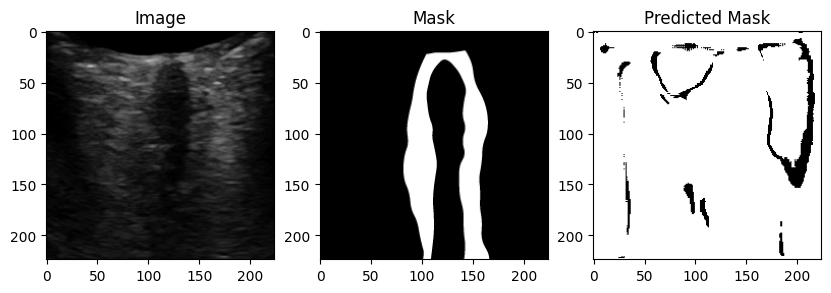

 33%|███▎      | 1/3 [00:01<00:02,  1.13s/it]

1/1 [==============================] - 0s 165ms/step


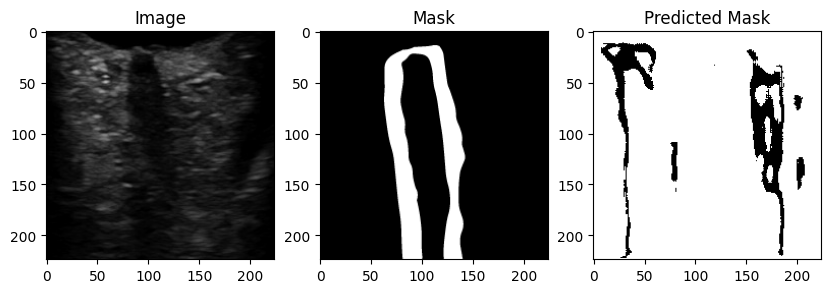

 67%|██████▋   | 2/3 [00:01<00:00,  1.25it/s]

1/1 [==============================] - 0s 161ms/step


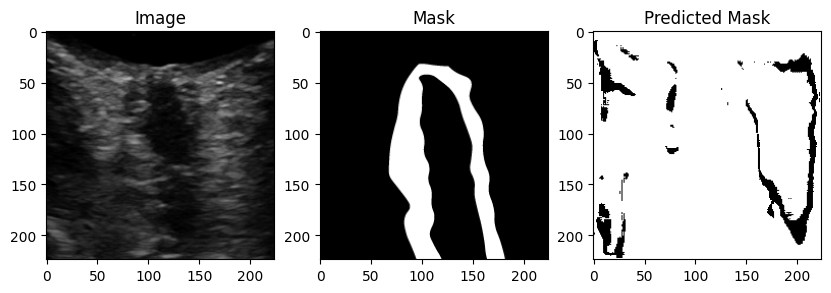

100%|██████████| 3/3 [00:02<00:00,  1.32it/s]


In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """
    train_x, train_y = X_train , y_train 
    test_x, test_y = X_test , y_test 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = encoder_decoder_mask2.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.95).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||#
#                                                                                                                                                                                                              #
#                                       THIS PART IS DEDICATED TO THE TRAIN_GENERATOR, WE WILL TRY TO GENERATE NEW DATA USING THE TRAINING DATA TOOL                                                           #
#                                                                                                                                                                                                              #
#||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#


from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image_size = 224

# # Specify the values for all arguments to data_generator_with_aug.
# data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                               horizontal_flip = False,
#                                               width_shift_range = 0.1,
#                                               height_shift_range = 0.1)
            
# data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)







# # Create a generator for the training set
# train_generator = data_generator_with_aug.flow(
#     X_train,  # input images
#     mask_dataset_train_,  # input labels
#     batch_size=32,  # batch size for training
#     shuffle=True,  # shuffle the data before each epoch
# )


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with desired augmentation settings
data_generator_with_aug = ImageDataGenerator(rotation_range=2, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=False)

# Generate augmented images
train_generator = data_generator_with_aug.flow(X_train, mask_dataset_train_, batch_size=batch_size*2)




In [ ]:

# Assuming 'model' is your UNET model
encoder_decoder_with_aug = Model(inputs=new_model.input, outputs=new_model.output)

for layer in encoder_decoder.layers[:45]:
    layer.trainable = True



# # Create the decoder part of the model
# decoder_input = Input(shape=encoder.output.shape[1:])  # Use encoder output shape as input shape
# decoder_output = new_model(decoder_input)  # Pass the input through the new_model
# decoder = Model(inputs=decoder_input, outputs=decoder_output)

# Compile the decoder with desired optimizer and loss function
encoder_decoder_with_aug.compile(optimizer='adam', loss='loss')

# Train the decoder with your data
encoder_decoder_with_aug.fit(train_generator,
            epochs=num_epochs*5,
            callbacks=callbacks)


Epoch 1/50
2/2 [==============================] - 10s 1s/step - loss: -2179.0291 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 4s 1s/step - loss: -2179.0291 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 4s 3s/step - loss: -2179.0291 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 4s 1s/step - loss: -2179.0291 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 4s 3s/step - loss: -2179.0293 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 4s 1s/step - loss: -2179.0293 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 4s 3s/step - loss: -2179.0293 - lr: 0.0010
Epoch 8/50
2/2 [==============================] - 4s 3s/step - loss: -2179.0291 - lr: 0.0010
Epoch 9/50
2/2 [==============================] - 4s 3s/step - loss: -2179.0291 - lr: 0.0010
Epoch 10/50
2/2 [==============================] - 4s 1s/step - loss: -2179.0291 - lr: 0.0010
Epoch 11/50
2/2 [==============================] - 4s 3s/step - loss

In [ ]:
# """ Seeding """
# np.random.seed(42)
# tf.random.set_seed(42)

# """ Directory for storing files """
# create_dir("files")

# """ Hyperparameters """
# batch_size = 4
# lr = 1e-4
# num_epochs = 10
# model_path = os.path.join("files", "model.h5")
# csv_path = os.path.join("files", "log.csv")

# """ Dataset """
# train_x, train_y = X_train , y_train 
# test_x, test_y = X_test , y_test 

# print(f"Train: {len(X_train)} - {len(y_train)}")
# print(f"Test : {len(X_test)} - {len(y_test)}")

# train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
# test_dataset = tf_dataset(train_x, train_y, batch=batch_size)

# """ Model """
# weights = model.get_weights()
# new_model = build_unet2((H, W, 3))
# new_model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])
# new_model.set_weights(weights)

# callbacks = [
#         ModelCheckpoint(model_path, verbose=1, save_best_only=True),
#         ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
#         CSVLogger(csv_path),
#         EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
#     ]



# #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
# for layer in new_model.layers:
# 	layer.trainable = False
    
# new_model.summary()  #Trainable parameters will be 0
# new_model.fit(
#     train_dataset,
#     epochs=num_epochs,
#     callbacks=callbacks
# )






Train: 12 - 12
Test : 3 - 3
Epoch 1/10
3/3 [==============================] - 24s 4s/step - loss: 0.1564 - dice_coef: 0.8436 - lr: 1.0000e-04
Epoch 2/10
3/3 [==============================] - 11s 4s/step - loss: -0.0635 - dice_coef: 1.0635 - lr: 1.0000e-04
Epoch 3/10
3/3 [==============================] - 12s 4s/step - loss: -0.1803 - dice_coef: 1.1803 - lr: 1.0000e-04
Epoch 4/10
3/3 [==============================] - 12s 4s/step - loss: -0.2390 - dice_coef: 1.2390 - lr: 1.0000e-04
Epoch 5/10
3/3 [==============================] - 12s 4s/step - loss: -0.2805 - dice_coef: 1.2805 - lr: 1.0000e-04
Epoch 6/10
3/3 [==============================] - 12s 4s/step - loss: -0.3421 - dice_coef: 1.3421 - lr: 1.0000e-04
Epoch 7/10
3/3 [==============================] - 12s 4s/step - loss: -0.4131 - dice_coef: 1.4131 - lr: 1.0000e-04
Epoch 8/10
3/3 [==============================] - 12s 4s/step - loss: -0.4838 - dice_coef: 1.4838 - lr: 1.0000e-04
Epoch 9/10
3/3 [==============================] - 12s

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 0s 434ms/step


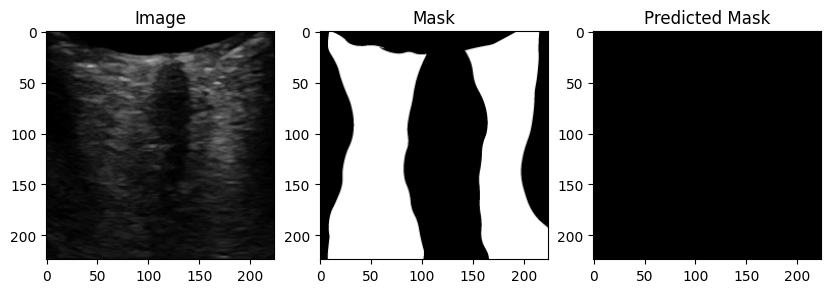

 33%|███▎      | 1/3 [00:00<00:01,  1.48it/s]

1/1 [==============================] - 0s 120ms/step


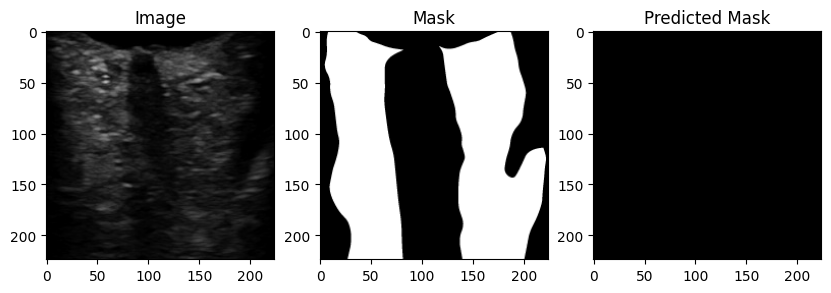

 67%|██████▋   | 2/3 [00:01<00:00,  2.05it/s]

1/1 [==============================] - 0s 136ms/step


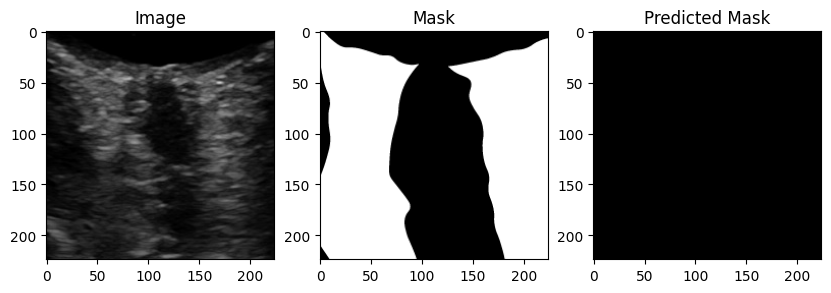

100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """
    train_x, train_y = X_train , y_train 
    test_x, test_y = X_test , y_test 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = encoder_decoder_with_aug.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.999999977).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 1s 655ms/step


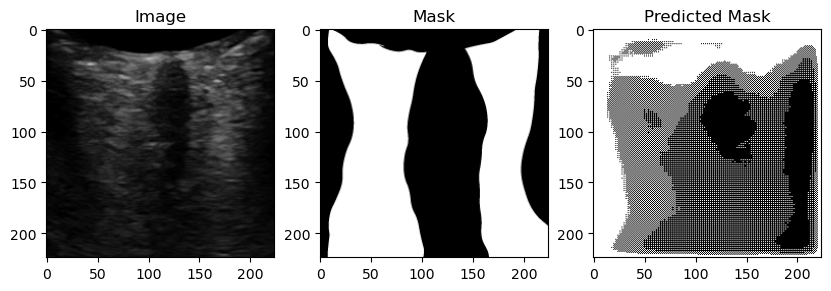


 33%|████████████████████████████                                                        | 1/3 [00:01<00:03,  1.55s/it]

1/1 [==============================] - 0s 399ms/step


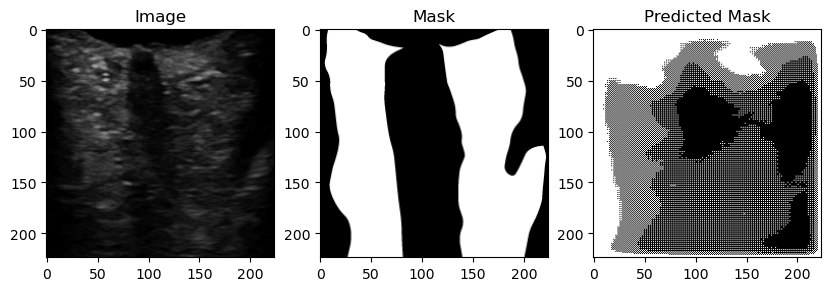


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:02<00:01,  1.38s/it]

1/1 [==============================] - 0s 377ms/step


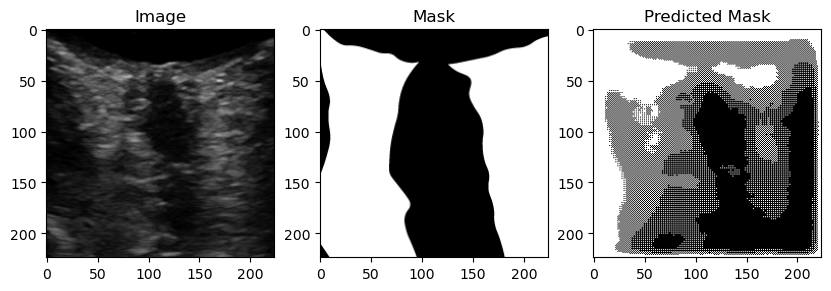

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.33s/it]


In [ ]:


import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """
    train_x, train_y = X_train , y_train 
    test_x, test_y = X_test , y_test 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = new_model.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.000000000001).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

#         """ Calculate the scores """
#         f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
#         jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
#         recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         SCORE.append([name, f1_value, jac_value, recall_value, precision_value])
        
#     """ Metrics values """
#     score = [s[1:]for s in SCORE]
#     score = np.mean(score, axis=0)
#     print(f"F1: {score[0]:0.5f}")
#     print(f"Jaccard: {score[1]:0.5f}")
#     print(f"Recall: {score[2]:0.5f}")
#     print(f"Precision: {score[3]:0.5f}")

#     df = pd.DataFrame(SCORE, columns=["Image", "F1", "Jaccard", "Recall", "Precision"])
#     df.to_csv("files/score.csv")


In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam


""" Global parameters """
H = 224
W = 224


def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)



def tf_parse(x, y):
    def _parse(x, y):
        x = cv2.resize(x, (W, H))
        x = x 
        x = x.astype(np.float32)
        y = cv2.resize(y, (W, H))
        y = y 
        y = y.astype(np.float32)
        y = np.expand_dims(y, axis=-1)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y


def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("files")

    """ Hyperparameters """
    batch_size = 4
    lr = 1e-4
    num_epochs = 10
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "log.csv")

    """ Dataset """
    train_x, train_y = X_train , y_train 
    test_x, test_y = X_test , y_test 

    print(f"Train: {len(X_train)} - {len(y_train)}")
    print(f"Test : {len(X_test)} - {len(y_test)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    test_dataset = tf_dataset(train_x, train_y, batch=batch_size)

    """ Model """
    model = build_unet2((H, W, 3)) #  Choose your model
    model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
    ]

    model.fit(
        train_dataset,
        epochs=num_epochs,
        callbacks=callbacks
    )


Train: 12 - 12
Test : 3 - 3
Epoch 1/10
3/3 [==============================] - 21s 2s/step - loss: 0.2380 - dice_coef: 0.7620 - lr: 1.0000e-04
Epoch 2/10
3/3 [==============================] - 7s 2s/step - loss: 0.1694 - dice_coef: 0.8306 - lr: 1.0000e-04
Epoch 3/10
3/3 [==============================] - 7s 2s/step - loss: 0.1155 - dice_coef: 0.8845 - lr: 1.0000e-04
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 0.0678 - dice_coef: 0.9322 - lr: 1.0000e-04
Epoch 5/10
3/3 [==============================] - 7s 2s/step - loss: 0.0229 - dice_coef: 0.9771 - lr: 1.0000e-04
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: -0.0248 - dice_coef: 1.0248 - lr: 1.0000e-04
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: -0.0888 - dice_coef: 1.0888 - lr: 1.0000e-04
Epoch 8/10
3/3 [==============================] - 8s 2s/step - loss: -0.1852 - dice_coef: 1.1852 - lr: 1.0000e-04
Epoch 9/10
3/3 [==============================] - 8s 3s/step - l


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


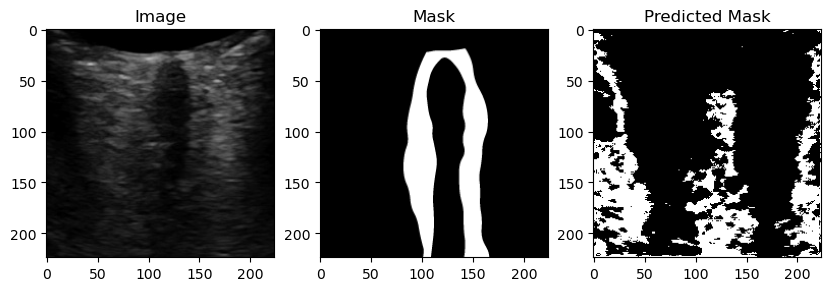


 33%|████████████████████████████                                                        | 1/3 [00:02<00:04,  2.17s/it]

1/1 [==============================] - 0s 246ms/step


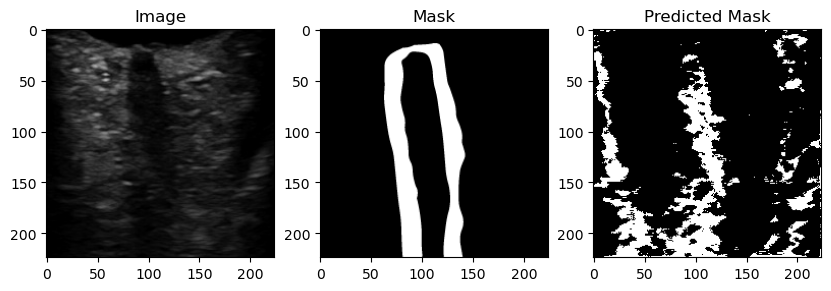


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:03<00:01,  1.54s/it]

1/1 [==============================] - 0s 274ms/step


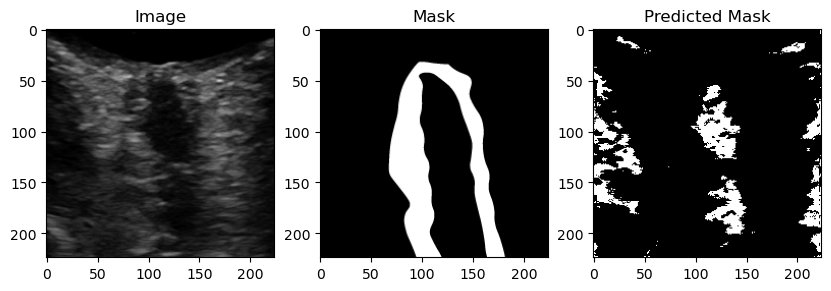

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.43s/it]


In [ ]:

# batch = 4 , 10 - 0.47 - 1e-4 mask 1 (Unet1)

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


""" Global parameters """
H = 224
W = 224

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)
    return cat_images


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Load the model """
#     with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
#         model = tf.keras.models.load_model(os.path.join("files", "model.h5"))

    """ Dataset """
    train_x, train_y = X_train , y_train 
    test_x, test_y = X_test , y_test 

    """ Prediction and Evaluation """
    SCORE = []
    for i in tqdm(range(len(test_x))):
        x = test_x[i]
        y = test_y[i]

        """ Extracting the name """
        name = str(i)

        """ Reading the image """
        image = x       ## [H, w, 3]
        image = cv2.resize(image, (W, H))       ## [H, w, 3]
        x = image                         ## [H, w, 3]

        """ Reading the mask """
        mask = y        ## [H, w]
        mask = cv2.resize(mask, (W, H))         ## [H, w]
        y = mask                     ## [H, w]

        """ Prediction """
        y_pred = model.predict(np.expand_dims(x, axis=0))[0]
        y_pred = np.squeeze(y_pred)
        y_pred = (y_pred > 0.47).astype(np.uint8)

        """ Saving the results """
        save_image_path = os.path.join("results", f"{name}.png")
        save_results(image, mask, y_pred, save_image_path)
        
        """ Plotting the images """
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        axs[0].imshow(image)
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Mask')
        axs[2].imshow(y_pred, cmap='gray')
        axs[2].set_title('Predicted Mask')
        plt.show()

#         """ Calculate the scores """
#         f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
#         jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
#         recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
#         SCORE.append([name, f1_value, jac_value, recall_value, precision_value])
        
#     """ Metrics values """
#     score = [s[1:]for s in SCORE]
#     score = np.mean(score, axis=0)
#     print(f"F1: {score[0]:0.5f}")
#     print(f"Jaccard: {score[1]:0.5f}")
#     print(f"Recall: {score[2]:0.5f}")
#     print(f"Precision: {score[3]:0.5f}")

#     df = pd.DataFrame(SCORE, columns=["Image", "F1", "Jaccard", "Recall", "Precision"])
#     df.to_csv("files/score.csv")


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model
import numpy as np

# Assuming you have defined train_x

in_lay = Input(train_x.shape[1:])
base_pretrained_model = VGG16(input_shape=train_x.shape[1:], include_top=False, weights='imagenet')
base_pretrained_model.trainable = False
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
features = BatchNormalization()(pt_features)

# Here we do an attention mechanism to turn pixels in the GAP on and off
attn_layer = Conv2D(64, kernel_size=(1, 1), padding='same', activation='relu')(features)
attn_layer = Conv2D(16, kernel_size=(1, 1), padding='same', activation='relu')(attn_layer)
attn_layer = LocallyConnected2D(1,
                                kernel_size=(1, 1),
                                padding='valid',
                                activation='sigmoid')(attn_layer)
# Fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size=(1, 1), padding='same',
               activation='linear', use_bias=False, weights=[up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# To account for missing values from the attention model
gap = Lambda(lambda x: x[0] / x[1], name='RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.25)(Dense(1024, activation='elu')(gap_dr))
out_layer = Dense(1, activation='linear')(dr_steps)  # Linear is what 16bit did
bone_age_model = Model(inputs=[in_lay], outputs=[out_layer])

bone_age_model.compile(optimizer='adam', loss='mse', metrics=[dice_coef])

# Now you can print the summary
bone_age_model.summary()


RuntimeError: The layer vgg16 has never been called and thus has no defined output shape.